<a href="https://colab.research.google.com/github/Pgupta1996/Ted_Talk_views_Prediction/blob/main/Ted_Talk_views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

Features information:
The dataset contains features like:
1. talk_id: Talk identification number provided by TED
2. title: Title of the talk
3. speaker_1: First speaker in TED's speaker list
4. all_speakers: Speakers in the talk
5. occupations: Occupations of the speakers
6. about_speakers: Blurb about each speaker
7. recorded_date: Date the talk was recorded
8. published_date: Date the talk was published to TED.com
9. event: Event or medium in which the talk was given
10. native_lang: Language the talk was given in
11. available_lang: All available languages (lang_code) for a talk
12. comments: Count of comments
13. duration: Duration in seconds
14. topics: Related tags or topics for the talk
15. related_talks: Related talks (key='talk_id',value='title')
16. url: URL of the talk
17. description: Description of the talk
18. transcript: Full transcript of the talk

**1. Important Libraries**

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time

**2. Dataset**

In [3]:
#loading the data file and creating a dataset
dataset=pd.read_csv("/content/data_ted_talks.csv")
dataset.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [4]:
dataset.tail()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [5]:
dataset.shape

(4005, 19)

**3. EDA**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [7]:
dataset.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [9]:
dataset.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


We have only 3 numerical columns in our dataset out of which 1 is our target variable and 2 can be used as features and rest all columns are either categorical or they contains textual data.
So, our main goal here is to find or generate some numerical columns from these columns.

In [10]:
dataset.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [11]:
#checking for duplicacy in the dataset
dataset.duplicated().sum()

0

The dataset contains Null values in few columns like:

1. all_speakers
2. occupations
3. about_speakers
4. comments
5. recorded_date

In [12]:
#dropping the url column
dataset=dataset.drop(columns=['url'])


**3.1 Explore speaker_1 column**

In [13]:
#Extarcting the records of top 5 most viewed videos
pop_dataset=dataset.nlargest(5, ['views'])
pop_dataset[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


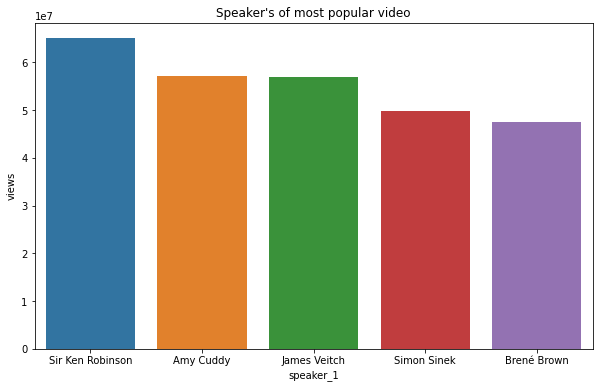

In [14]:
#finding Speaker's of most popular video
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular video")
sns.barplot(x='speaker_1',y='views',data=pop_dataset)

In [15]:
#finding more most popular speaker from the dataset
pop_speaker_dataset=dataset.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(10,['views'])
pop_speaker_dataset.reset_index(inplace=True)
pop_speaker_dataset

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


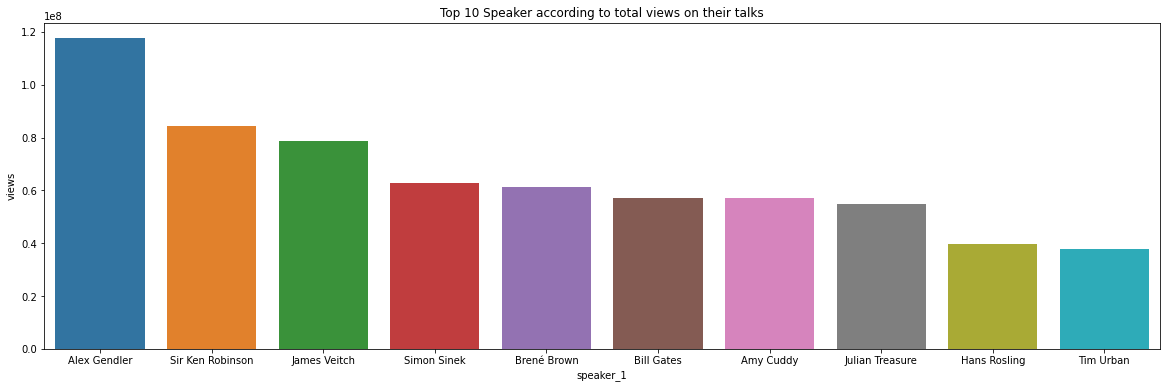

In [16]:
# most popular Speaker according to total views on their talks
plt.figure(figsize=(20,6))
plt.title('Top 10 Speaker according to total views on their talks')
sns.barplot(x='speaker_1',y='views',data=pop_speaker_dataset)

**Here we can see Alex Gendler is the most popular speaker followed by Sir Ken Robinson**

**3.2 Explore the event column**

In [17]:
#printing the len of unique values in event column
len(dataset.event.unique())

459

In [18]:
#let's find the most frequent event categories
freq_event_dataset=dataset[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
freq_event_dataset.reset_index(inplace=True)
freq_event_dataset

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


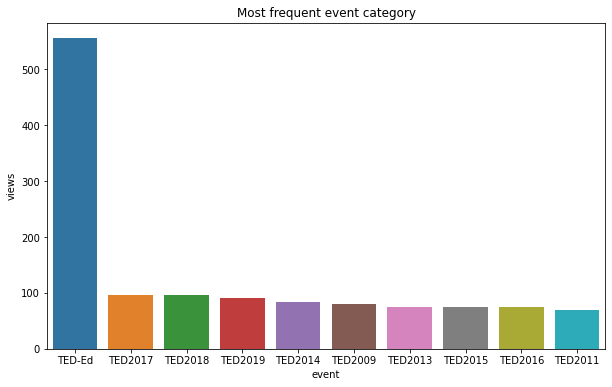

In [19]:
#plotting Most frequent event category
plt.figure(figsize=(10,6))
plt.title('Most frequent event category')
sns.barplot(x='event',y='views',data=freq_event_dataset)

In [20]:
#let's find the most popular event categories
pop_event_dataset=dataset[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
pop_event_dataset.reset_index(inplace=True)
pop_event_dataset

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


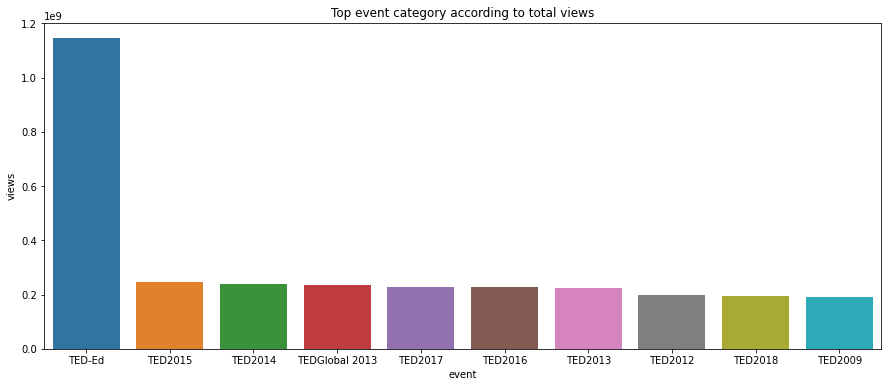

In [21]:
#plotting the Top event category according to total views
plt.figure(figsize=(15,6))
plt.title('Top event category according to total views')
sns.barplot(x='event',y='views',data=pop_event_dataset)

**3.3 Explore native_lang column**

In [22]:
#printing the value counts of native_lang column
dataset.native_lang.value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

**Here, approx 99% values in native_lang column is en.
So, this column will not impact much and of no use to us and we can simply remove it.**

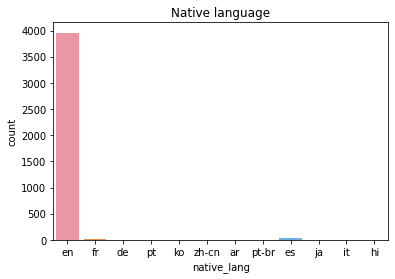

In [23]:
#plotting the countplot of native_lang column
plt.title('Native language')
sns.countplot(dataset['native_lang'])

In [24]:
#Dropping the native_lang column
dataset.drop(columns='native_lang',inplace=True)

**3.4 Explore the title column and visualize the most frequent words in title.**

In [25]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 157160 words in the combination of all titles.


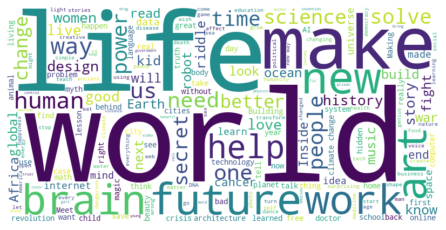

In [26]:
#making of word cloud from title column
text = " ".join(topic for topic in dataset.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))
 
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
 
plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**Majority of Titles contains words like life, world, make, new, future, people,brain etc.**

**3.5 Visualize most popular topic tags with word cloud**

There are 404126 words in the combination of all topics.


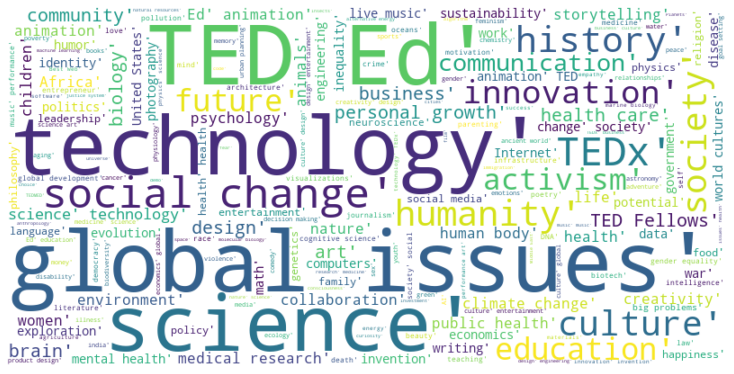

In [27]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in dataset.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))
 
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
 
plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**3.6 Explore occupation column.**

In [28]:
dataset['occupations'][1]

"{0: ['global health expert; data visionary']}"

Occupations column contains a dictionary for each row storing the occupations of each speaker as values.

In [29]:
#counting for null values in occupations column
dataset['occupations'].isnull().sum()

522

In [30]:
import numpy as np
df = dataset['occupations'].replace(np.nan, 'other', regex=True)
df= df.reset_index()
df['occupations'].isnull().sum()

0

In [31]:
dataset.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


We have 522 Non values in occupations column.
Let's replace those Null values with another category called 'other'.

In [32]:
#replacing Nan values of occupations column with other 
for index, row in dataset.iterrows():
    if pd.isnull(row['occupations']):
        dataset['occupations'][index] = str({0:'Other'})

In [33]:
#applying  function on occupations column
dataset['occupations'] = dataset.apply(lambda row: eval(row['occupations']), axis=1)
dataset.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [34]:
#defining a new feature called occupation
dataset['occupation'] = 'other'
#iterating through the each row and extracting occupations of speakers
for index, row in dataset.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    dataset.loc[index,'occupation'] = str(occup_list)
 
dataset.tail()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,description,transcript,occupation
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",health activist
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},{0: 'Other'},NaN,307187,2020-04-27,2020-04-27,TED-Ed,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",O
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...","Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,law researcher
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},{0: 'Other'},NaN,56582,2020-04-28,2020-04-30,TED-Ed,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",O
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},{0: 'Other'},NaN,0,2020-04-30,2020-04-30,TED-Ed,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,O


In [35]:
#Checking the length of unique occupation in event column.
len(dataset['occupation'].unique())

1552

[Text(0.5, 1.0, "top 15 most frequent speaker's occupations")]

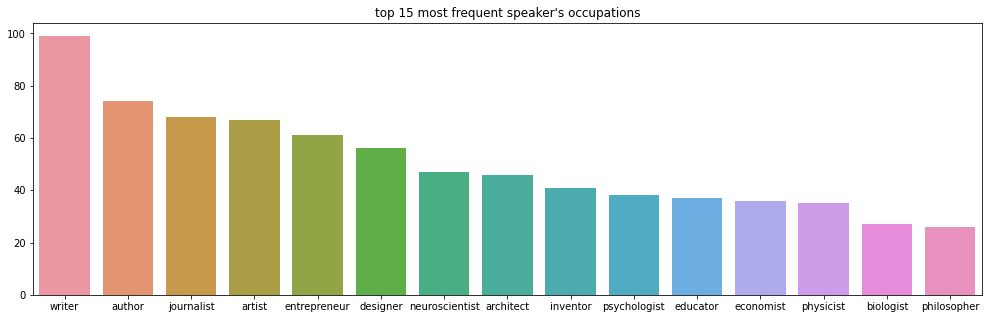

In [36]:
#Printing the top 15 most frequent speaker's occupations
occ_dataset=dataset[dataset['occupation']!='O']
fig,ax=plt.subplots(figsize=(17,5))
a=sns.barplot(x=occ_dataset['occupation'].value_counts(ascending=False).head(15).index, 
              y=occ_dataset['occupation'].value_counts(ascending=False).head(15).values, ax=ax)
a.set(title="top 15 most frequent speaker's occupations")

In [37]:
#printing the value_counts of occupation column
occ_dataset['occupation'].value_counts().head(15)

writer            99
author            74
journalist        68
artist            67
entrepreneur      61
designer          56
neuroscientist    47
architect         46
inventor          41
psychologist      38
educator          37
economist         36
physicist         35
biologist         27
philosopher       26
Name: occupation, dtype: int64

There are 55651 words in the combination of all occupations.


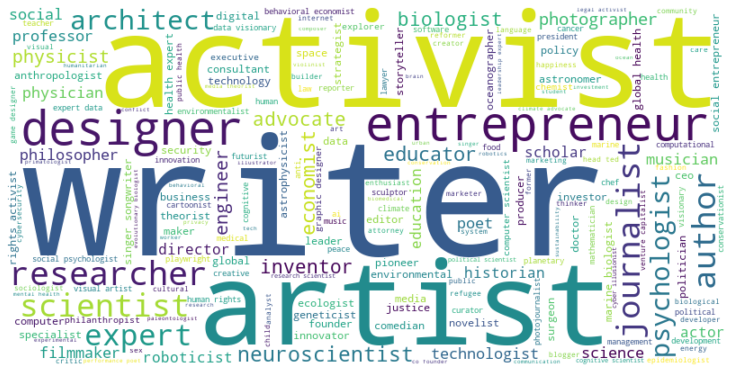

In [38]:
#Let's make the world cloud for occupations column.
text = " ".join(occ for occ in occ_dataset.occupation.astype(str))
print ("There are {} words in the combination of all occupations.".format(len(text)))
 
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
 
plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**3.7 Explore published_date column**

In [39]:
#applying strptime on published_date column
import datetime
dataset['published_date'] = dataset['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [40]:
#extracting release day, month and year from the published date column
dataset['release_day'] = dataset['published_date'].apply(lambda x: x.weekday())
dataset['release_month']=dataset['published_date'].apply(lambda x: x.month)
dataset['release_year'] = dataset['published_date'].apply(lambda x: x.year)

**I have extracted weekday month and year from published_date column and added three separate columns as:**

1. release_day
2. release_month
3. release_year

In [41]:
#encoding of release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dataset['release_day']=dataset['release_day'].map(week_day)

In [42]:
#Checking the most frequent release day of the week.
freq_rel_day=dataset[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,release_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


Text(0.5, 1.0, 'Most frequent release days')

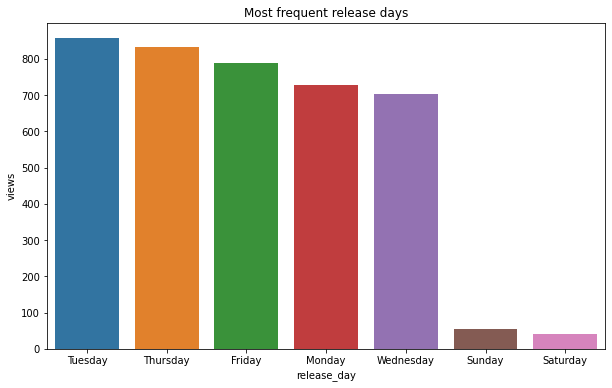

In [43]:
# checking the day of the week having maximum release date 
plt.figure(figsize=(10,6))
sns.barplot(x='release_day',y='views',data=freq_rel_day)
plt.title('Most frequent release days')

In [44]:
#Let's check the best release day of the week with respect to average views
pop_rel_day=dataset[['release_day','views']].groupby('release_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

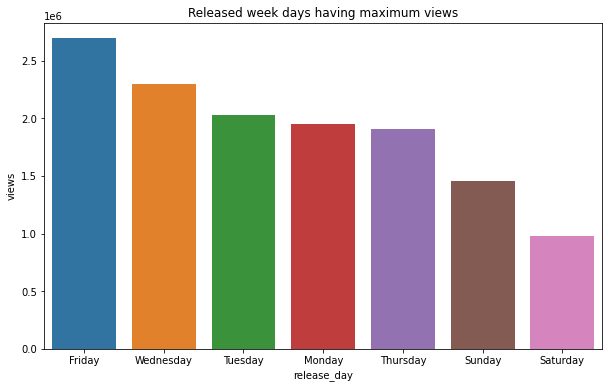

In [45]:
plt.figure(figsize=(10,6))
plt.title('Released week days having maximum views')
sns.barplot(x='release_day',y='views',data=pop_rel_day)

Conclusion:

1. Most videos are published on Tuesday followed by Thursday.
2. The videos published on Friday are more popular (more average views) followed by wednesday.
3. Friday release is impacting the views of the video

**3.7 Explore release_month column**

In [46]:
#encoding of release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dataset['release_month']=dataset['release_month'].map(month_dict)

In [47]:
#checking months having maximum release 
freq_rel_month=dataset[['release_month','views']].groupby('release_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)

Text(0.5, 1.0, 'Most frequent release months')

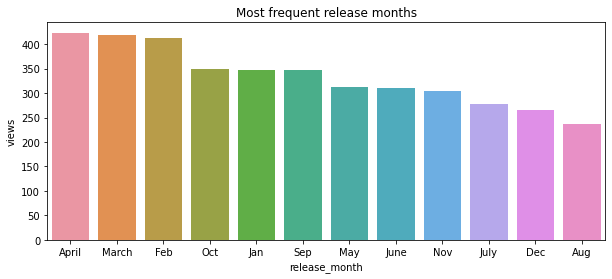

In [48]:
# checking the months having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

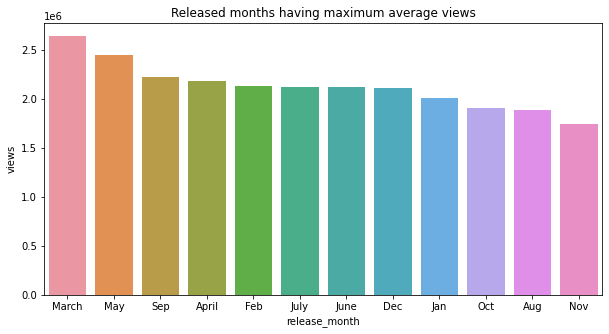

In [49]:
#Printing the most popular release month according to average Views
pop_rel_month=dataset[['release_month','views']].groupby('release_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)
 
plt.figure(figsize=(10,5))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=pop_rel_month)

April have maximum released videos, But the videos released in March are more popular (i.e. have more average views) followed by May and Sep.

**3.8 Explore release_year column.**

In [50]:
#checking years having maximum release 
freq_rel_year=dataset[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)

Text(0.5, 1.0, 'Most frequent release years')

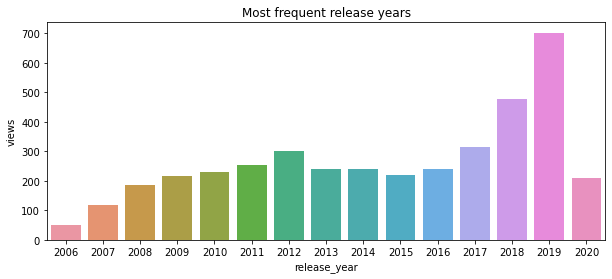

In [51]:
#Plotting the years having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_year',y='views',data=freq_rel_year)
plt.title('Most frequent release years')

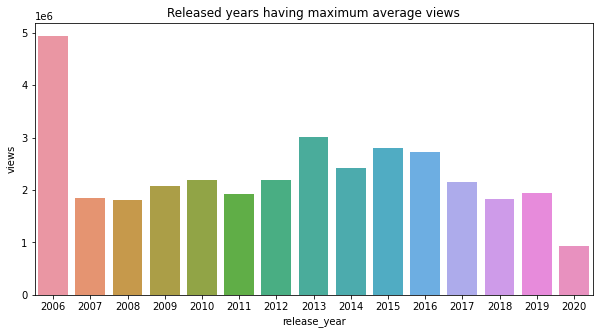

In [52]:
#Printing the most popular release years according to AVERAGE Views
pop_rel_year=dataset[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)
 #plotting the most popular release year acc to avg. views
plt.figure(figsize=(10,5))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views',data=pop_rel_year)

Most videos are published in 2019 followed by 2018 and 2017.
But the videos published in 2006 are most viewed followed by 2013 and 2015.

**3.9 Let's plot some numerical features.**

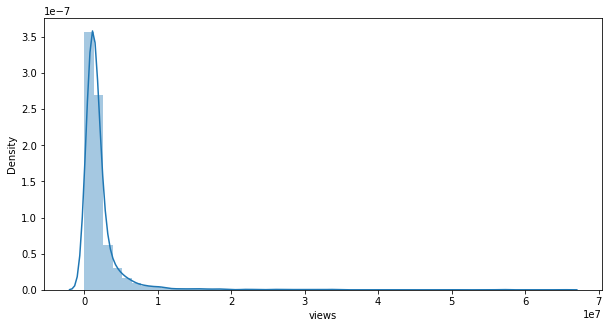

In [53]:
#plotting the densityplot of target variable
plt.figure(figsize=(10,5))
sns.distplot(dataset['views'])

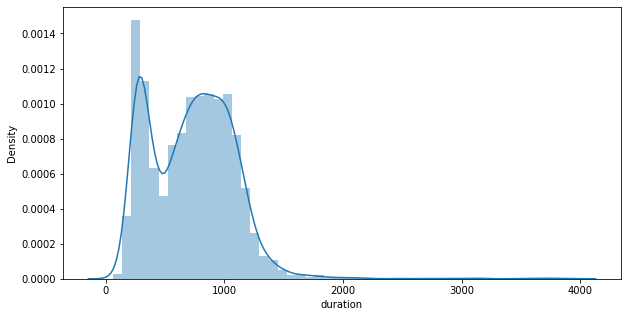

In [54]:
#plotting the densityplot of duration
plt.figure(figsize=(10,5))
sns.distplot(dataset['duration'])

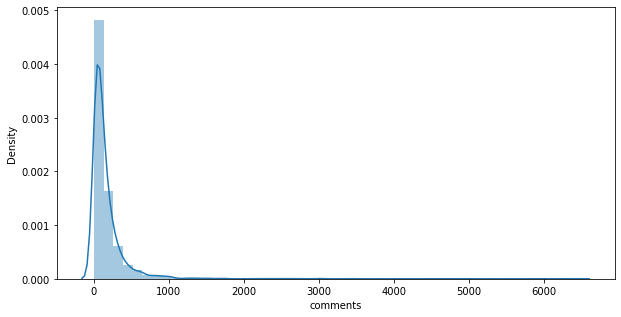

In [55]:
##plotting the densityplot of comments
plt.figure(figsize=(10,5))
sns.distplot(dataset['comments'])

**4.Feature Engineering**

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

**4.1 Feature Engineering on Speaker_1 column**

In [56]:
#importing libraries
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

In [57]:
len(dataset['speaker_1'].unique())

3274

I are going to use target encoding for speaker_1 column as it has high cardinality number around 3000.

Target encoding is the process of replacing a categorical value with the mean of the target variable. Any non-categorical columns are automatically dropped by the target encoder model. 

This can help improve machine learning accuracy since algorithms tend to have a hard time dealing with high cardinality columns.

In [58]:
#Doing target encoding on speaker_1 column
pop_speaker=dataset.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
dataset['speaker_1_avg_views']=dataset['speaker_1'].map(pop_speaker)

In [59]:
dataset['speaker_1_avg_views']

0       2.190599e+06
1       3.987156e+06
2       2.156190e+06
3       1.979411e+06
4       2.812684e+07
            ...     
4000    8.569210e+05
4001    3.071870e+05
4002    4.644140e+05
4003    5.658200e+04
4004    0.000000e+00
Name: speaker_1_avg_views, Length: 4005, dtype: float64

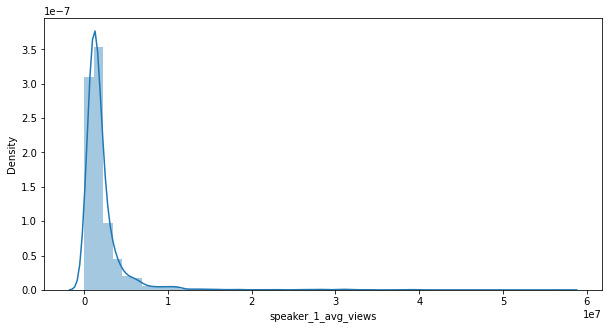

In [60]:
#Let's plot the speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(dataset['speaker_1_avg_views'])

**4.1 Feature Engineering on event column**

In [61]:
#finding the unique events from the event column.
event_list=list(dataset.event.unique())
len(event_list)

459

The dataset has 459 unique event category but lots of these names are quite similar and can be categorised together

In [62]:
#applying target encoding on event column
pop_event=dataset.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_event=pop_event.to_dict()
pop_event=pop_event.values()
pop_event=  list(pop_event)[0]
dataset['event_wise_avg_views']=dataset['event'].map(pop_event)

Now, we have done target encoding on categorical values in the event column.
We can further use this feature directly while modelling.
We can drop the event column now.

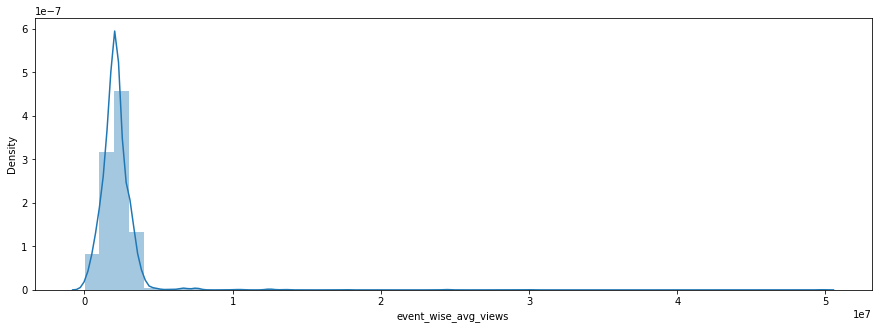

In [63]:
#Plotting the distplot of event_wise_avg_views
sns.distplot(dataset['event_wise_avg_views'])

**Let's drop the event column as it is of no use now.**

In [64]:
#Let's drop event column
dataset=dataset.drop(columns='event')

**4.3 Feature Engineering on topics column**

In [65]:
dataset['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

**The topics column basically contains the list of topic tags associated with each video.**

In [66]:
dataset['topics'] = dataset.apply(lambda row: eval(row['topics']), axis=1)
dataset['topics']

0       [alternative energy, cars, climate change, cul...
1       [Africa, Asia, Google, demo, economics, global...
2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
4       [children, creativity, culture, dance, educati...
                              ...                        
4000    [activism, data, technology, mental health, so...
4001    [TED-Ed, education, history, animation, intell...
4002         [society, law, policy, justice system, TEDx]
4003    [TED-Ed, education, animation, United States, ...
4004    [animals, TED-Ed, animation, oceans, science, ...
Name: topics, Length: 4005, dtype: object

**Let's add a new feature which contain the count of total no of topics for a particular video.**

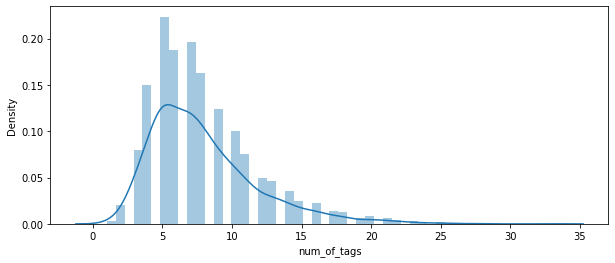

In [67]:
dataset['num_of_tags'] = dataset.apply(lambda x: len(x['topics']), axis=1)
plt.figure(figsize=(10,4))
sns.distplot(dataset['num_of_tags'])

In [68]:
#Let's do target encoding on topics column.

dataset['topics'][1]

['Africa',
 'Asia',
 'Google',
 'demo',
 'economics',
 'global issues',
 'health',
 'statistics',
 'global development',
 'visualizations',
 'math']

In [69]:
#extracting the unique topics from topics list of each talk
unique_topics=[]
for i in range(0,len(dataset)):
  temp=dataset['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)
      
len(unique_topics)

457

In [70]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=dataset['topics'][i]
    if(topic in temp2):
      temp+=dataset['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [71]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(dataset)):
  temp=0
  temp_topic=dataset['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))
 
se = pd.Series(topics_wise_avg_views)
dataset['topics_wise_avg_views'] = se.values

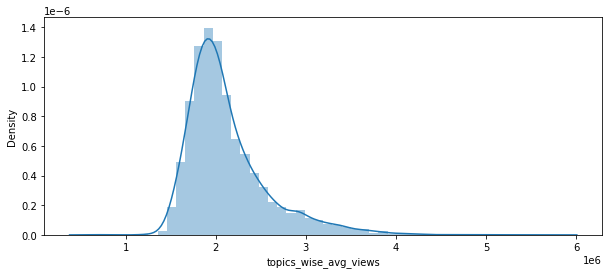

In [72]:
#plotting topics_wise_avg_views
plt.figure(figsize=(10,4))
sns.distplot(dataset['topics_wise_avg_views'])

**4.5 Feature Engineering on published_date column.**

We can add a new column called video_age which is the difference of current year and publish.

In [73]:
dataset['video_age']=2021-dataset['release_year']
#we can drop published_date column.
dataset=dataset.drop(columns='published_date')

**4.6 Feature Engineering on related_talks column.**

In [74]:
#applying eval function on available_lang column
dataset['related_talks'] = dataset.apply(lambda row: eval(row['related_talks']), axis=1)
dataset['related_talks'][0]

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 2339: "Climate change is happening. Here's how we adapt",
 29968: 'The most important thing you can do to fight climate change: talk about it',
 54715: 'How we can turn the tide on climate'}

**Conclusion**

1. Related_talks column contains a dictionary containing information about six related videos with talk_id as key and video title as it's value.
2. We can take mean of the views of those six related talks for each video and can add as a new feature called related_views.

**5. Data Cleaning.**

**5.1 Outlier Treatment on numerical columns.**

In [75]:
#checking the outliers
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
 
((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).sum()

about_speakers             0
all_speakers               0
available_lang             0
comments                 261
description                0
duration                  21
event_wise_avg_views     156
num_of_tags              116
occupation                 0
occupations                0
recorded_date              0
related_talks              0
release_day                0
release_month              0
release_year               0
speaker_1                  0
speaker_1_avg_views      373
talk_id                  119
title                      0
topics                     0
topics_wise_avg_views    242
transcript                 0
video_age                  0
views                    393
dtype: int64

**Conclusion:**

1. We have outliers in few columns which needs to be treated well.
2. I am replacing the outliers with the extreme values.

In [76]:
# Replacing outliers with extreme values
for i in ['comments','duration','num_of_tags','views','talk_id','speaker_1_avg_views','topics_wise_avg_views','event_wise_avg_views']:
  Q1 = dataset[i].quantile(0.25)
  Q3 = dataset[i].quantile(0.75)
  IQR = Q3 - Q1
 
  dataset[i]=np.where(dataset[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(dataset[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),dataset[i]))

In [77]:
#Let's check the outliers again
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).sum()

about_speakers           0
all_speakers             0
available_lang           0
comments                 0
description              0
duration                 0
event_wise_avg_views     0
num_of_tags              0
occupation               0
occupations              0
recorded_date            0
related_talks            0
release_day              0
release_month            0
release_year             0
speaker_1                0
speaker_1_avg_views      0
talk_id                  0
title                    0
topics                   0
topics_wise_avg_views    0
transcript               0
video_age                0
views                    0
dtype: int64

**Now, there are no outlier there.**

In [78]:
dataset.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'available_lang',
       'comments', 'duration', 'topics', 'related_talks', 'description',
       'transcript', 'occupation', 'release_day', 'release_month',
       'release_year', 'speaker_1_avg_views', 'event_wise_avg_views',
       'num_of_tags', 'topics_wise_avg_views', 'video_age'],
      dtype='object')

In [79]:
#dropping unimportant columns from the dataframe.
dataset.drop(columns=['talk_id','title','speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'recorded_date','topics','related_talks','transcript','description','occupation','release_year'],inplace=True)

In [80]:
dataset.columns

Index(['views', 'available_lang', 'comments', 'duration', 'release_day',
       'release_month', 'speaker_1_avg_views', 'event_wise_avg_views',
       'num_of_tags', 'topics_wise_avg_views', 'video_age'],
      dtype='object')

In [81]:
dataset.drop(columns=['available_lang'],inplace=True)
dataset.head(2)

,views,comments,duration,release_day,release_month,speaker_1_avg_views,event_wise_avg_views,num_of_tags,topics_wise_avg_views,video_age
0,3523392.0,272.0,977.0,Tuesday,June,2190599.25,3.778944e+06,9.0,1750846.0,15
1,4009671.5,413.0,1190.0,Tuesday,June,3987156.10,3.778944e+06,11.0,2290338.0,15


In [82]:
#separating the dependent and independent variables
y=dataset['views']
X=dataset.drop(columns='views')

In [83]:
X

,comments,duration,release_day,release_month,speaker_1_avg_views,event_wise_avg_views,num_of_tags,topics_wise_avg_views,video_age
0,272.0,977.0,Tuesday,June,2190599.25,3.778944e+06,9.0,1750846.0,15
1,413.0,1190.0,Tuesday,June,3987156.10,3.778944e+06,11.0,2290338.0,15
2,124.0,1286.0,Tuesday,June,2156189.75,3.778944e+06,9.0,1915719.0,15
3,219.0,1116.0,Tuesday,June,1979411.00,3.778944e+06,9.0,1642100.0,15
4,413.0,1164.0,Tuesday,June,4129562.75,3.778944e+06,7.0,2904226.0,15
...,...,...,...,...,...,...,...,...,...
4000,6.0,690.0,Monday,April,856921.00,6.772082e+05,7.0,2134416.0,1
4001,NaN,346.0,Monday,April,307187.00,2.059996e+06,8.0,2343639.0,1
4002,9.0,774.0,Tuesday,April,464414.00,1.556845e+06,5.0,1805407.0,1
4003,NaN,257.0,Thursday,April,56582.00,2.059996e+06,14.0,1978146.0,1


**Using get_dummies function.**

In [84]:
#one hot encoding on categorical features
X=pd.get_dummies(X)
X.shape

(4005, 26)

In [85]:
X.head(3)

,comments,duration,speaker_1_avg_views,event_wise_avg_views,num_of_tags,topics_wise_avg_views,video_age,release_day_Friday,release_day_Monday,release_day_Saturday,...,release_month_Dec,release_month_Feb,release_month_Jan,release_month_July,release_month_June,release_month_March,release_month_May,release_month_Nov,release_month_Oct,release_month_Sep
0,272.0,977.0,2190599.25,3.778944e+06,9.0,1750846.0,15,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,413.0,1190.0,3987156.10,3.778944e+06,11.0,2290338.0,15,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,124.0,1286.0,2156189.75,3.778944e+06,9.0,1915719.0,15,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Now, we have around 26 features after one hot encoding.
Applying proper feature selection is must here to get rid of unimportant features.

**5.2 Let's treat Non values of numerical columns using KNNImputer**

In [86]:
#checking for null values
X[['duration','comments']].isnull().sum()

duration      0
comments    655
dtype: int64

In [87]:
#Taking features for using in KNNImputer
outlier_dataset=['duration','comments','speaker_1_avg_views','event_wise_avg_views']

In [88]:
# Before applying KNNImputer, we have to scale features so avoid bias.
scaler = MinMaxScaler()
#Import libraries
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer()
#fitting the model
imputer.fit(scaler.fit_transform(X[outlier_dataset]))
# transform the dataset
X[outlier_dataset] = imputer.transform(scaler.fit_transform(X[outlier_dataset]))
#again applying inverse_transform on the data
X[outlier_dataset] = scaler.inverse_transform(X[outlier_dataset])

In [89]:
#checking for null values
X[['duration','comments']].isnull().sum()

duration    0
comments    0
dtype: int64

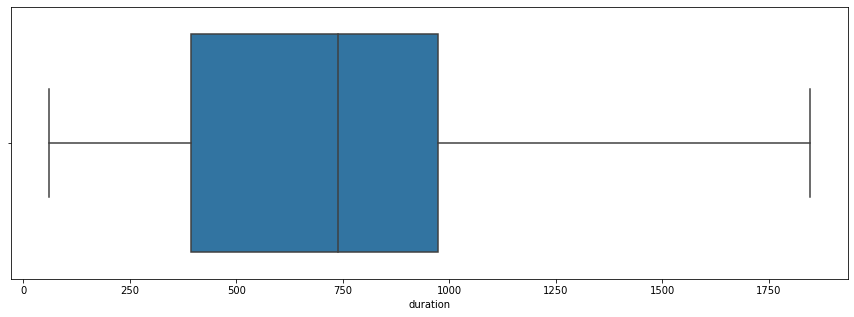

In [90]:
#Let's make a boxplot of duration column.

sns.boxplot(x=X['duration'])

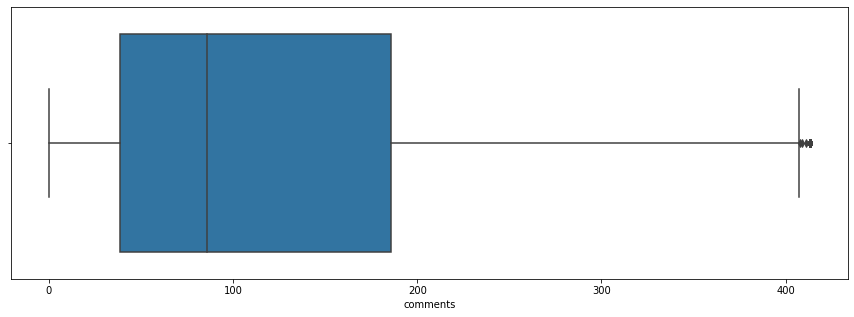

In [91]:
#Let's make a boxplot of comments column.

sns.boxplot(x=X['comments'])

**6. Feature Selection**

In [92]:
#printing the shape of features
X.shape

(4005, 26)

**Conclusion:**

1. From here we can see that a lot more work on feature selection is required.

2. Let's do feature selection from these 26 dependent variables and select the best set of features.

**6.1 Feature selection for numerical features using f_regression.**

In [93]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#finding the f scores of each features
f_scores = f_regression(X, y)
f_scores

(array([1.56930257e+03, 3.63920086e+01, 1.61894391e+04, 6.21645241e+02,
        2.22138034e+00, 8.21343686e+02, 7.26280093e-01, 4.93457071e+01,
        2.14095360e+00, 1.69801520e+01, 1.32688878e+01, 4.22782469e+00,
        1.54608611e+00, 5.17596240e-03, 4.42937898e+00, 5.29481408e-01,
        3.19042540e+00, 9.10855944e-01, 3.61273001e+00, 1.59320065e+00,
        7.00546927e-01, 1.20164944e+01, 3.34840829e+00, 3.24993722e+00,
        6.69041425e+00, 1.59197663e+00]),
 array([7.27669071e-290, 1.75975910e-009, 0.00000000e+000, 1.13785436e-127,
        1.36190106e-001, 1.81039118e-164, 3.94142602e-001, 2.51061953e-012,
        1.43491232e-001, 3.85368618e-005, 2.73265521e-004, 3.98310726e-002,
        2.13786984e-001, 9.42649939e-001, 3.53875418e-002, 4.66867525e-001,
        7.41463988e-002, 3.39945041e-001, 5.74106856e-002, 2.06942978e-001,
        4.02649944e-001, 5.32863676e-004, 6.73443607e-002, 7.15013746e-002,
        9.72823723e-003, 2.07117470e-001]))

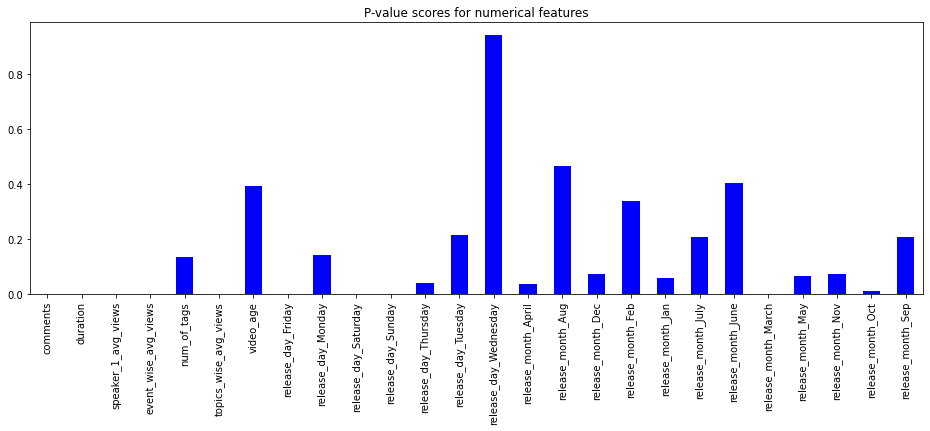

In [94]:
#The second array consists of p-values that we need. So,
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

**Conclusion:**

From here using p value analysis we can drop those features having high p values.

In [95]:
X.columns

Index(['comments', 'duration', 'speaker_1_avg_views', 'event_wise_avg_views',
       'num_of_tags', 'topics_wise_avg_views', 'video_age',
       'release_day_Friday', 'release_day_Monday', 'release_day_Saturday',
       'release_day_Sunday', 'release_day_Thursday', 'release_day_Tuesday',
       'release_day_Wednesday', 'release_month_April', 'release_month_Aug',
       'release_month_Dec', 'release_month_Feb', 'release_month_Jan',
       'release_month_July', 'release_month_June', 'release_month_March',
       'release_month_May', 'release_month_Nov', 'release_month_Oct',
       'release_month_Sep'],
      dtype='object')

In [96]:
#Let's take all the important features in a list.
imp=['comments', 'duration','event_wise_avg_views','release_day_Saturday',
       'release_day_Friday','release_month_March','speaker_1_avg_views','topics_wise_avg_views']
len(imp)

8

In [97]:
#let's take the important features
X=X[imp]

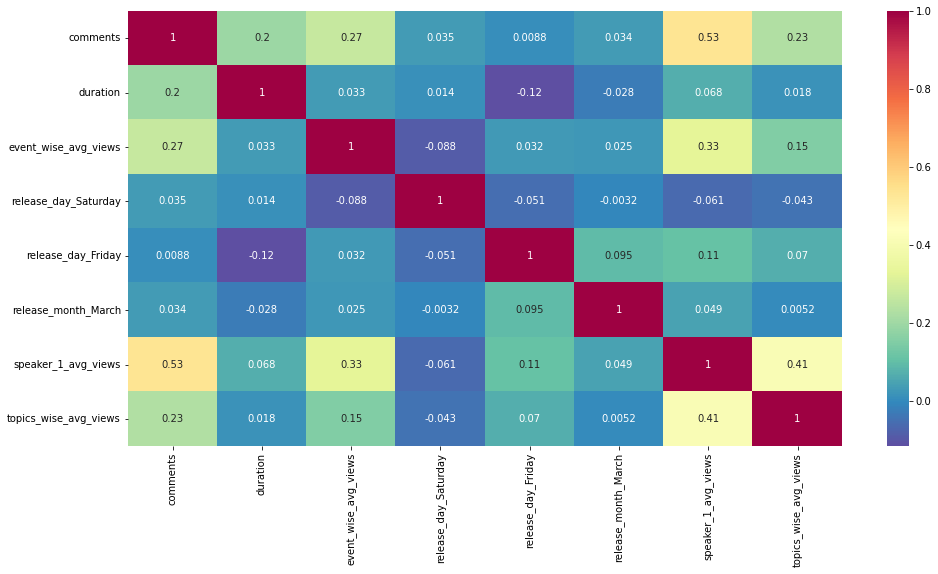

In [98]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(X.corr(),annot=True, cmap='Spectral_r')

**7. Fitting the regression models and HyperParameter Tuning**


**7.1 Let's apply linear regression model.**

In [99]:
#applying train &test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
#fitting the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [101]:
#predicting the values for train and test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
 
MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE)
 
RMSE = np.sqrt(MSE)
print("RMSE on test is" ,RMSE)
 
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE on test is 222345469424.93536
RMSE on test is 471535.22607005236
Training MAE: 267526.83
Test MAE: 261485.69


**Conclusion:**

Despite of the fact that our features are not following linear assumption which we have checked earlier, this model is giving a satisfactory score.

**7.2 Random Forest Regressor**

In [102]:
#applying RandomForestRegressor on default parameters
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

Training MAE: 96876.25
Test MAE: 237323.01
Target mean: 1661354.12
Target std: 1102595.71


**Conclusion:**

It's not a good score but we can improve by doing some feature selection and by hyperparameter tuning.


**Defining Parameter Dict for Hyperparameter Tuning**

In [103]:
#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [104]:
#Hyperparameter Tuning using Randomized Search CV

# Create an instance of the random forest regressor
rf_model = RandomForestRegressor(criterion='mae')
 
#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_leaf': [10, 30, 40, 50, 60,
                                                             80],
                                        'min_samples_split': [50, 80, 100, 150,
                                                              200],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]})

In [105]:
#finding the optimal model w.r.t. best_estimator_
rf_optimal_model = rf_random.best_estimator_
rf_optimal_model

RandomForestRegressor(criterion='mae', max_depth=6, min_samples_leaf=10,
                      min_samples_split=150, n_estimators=150)

In [106]:
#calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 195456.23
Test MAE: 199299.46


In [107]:
# make predictions for test data
y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)*100}')
r_squared= r2_score(y_test,y_hat)*100
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 82.07059319125358
For test set the R_Squared for RFforest is 81.2139539345961 and adjusted R_Squared is 81.37454243096167


In [108]:
#Let's plot all the scores of rf_optimal_model together.
#Defining the model
model =[
        ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)]
      ]
#Let's run the the model and store the results in a dataframe
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)
 
results_df_rf = pd.DataFrame(model_data)
 
#printing the results_df_rf
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,186964.04142,192686.481273,0.80577,0.802021,485901.461036,490446.914551


**7.3 Let's try ExtraTreesRegressor.**

In [109]:
et = ExtraTreesRegressor(criterion='mae', max_depth=30, n_estimators=200, min_samples_leaf=2, min_samples_split=6)
et.fit(X_train, y_train)
y_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 129808.03
Test MAE: 207525.51


In [110]:
#Hyperparameter Tuning using Randomized Search CV

#Extra Trees Regressor paramdict
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [111]:
# Create an instance of the Extratrees regressor
et_model = ExtraTreesRegressor(criterion='mae')
 
#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   4.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   4.5s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   4.5s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   4.4s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   4.5s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   2.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   2.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   2.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   2.8s
[CV] END max_depth=8,

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [112]:
et_optimal_model = et_random.best_estimator_
y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 203993.05
Test MAE: 200619.55


In [113]:
# make predictions for test data
y_hat = et_optimal_model.predict(X_test)
print(f'r_sqr value for train: {et_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.7982305473404437
For test the R_Squared for ExtraTreesRegressor is 0.8077779666403375 and adjusted R_Squared is 0.8073931377447225


**Let's plot all the scores of et_optimal_model together.**

In [114]:
#Defining the model
model = [
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae',max_depth=6, min_samples_leaf=40,min_samples_split=100, n_estimators=50)],
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)
 
results_df_et = pd.DataFrame(model_data)
#printing the results_df_et
results_df_et

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,ExtraTreeRegressor :,204785.458305,202102.519459,0.797292,0.805349,496391.935954,486307.037638


**Let's plot the feature importance score w.r.t. ExtraTreesRegressor model**

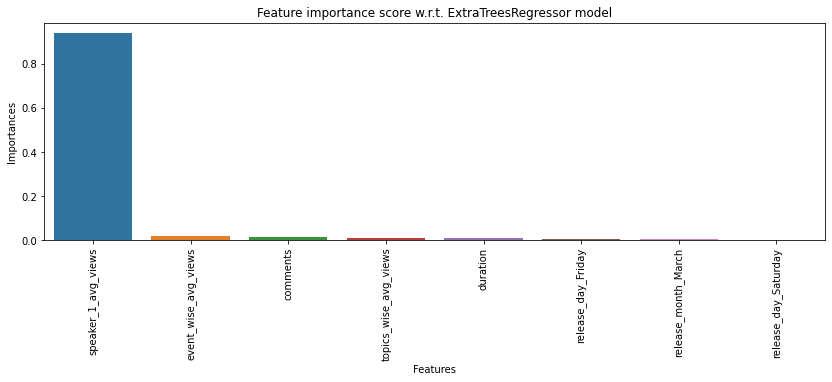

In [115]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': et.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. ExtraTreesRegressor model')
plt.show()

**Conclusion:**

1. speaker1_avg_views is the most important feature in RandomForestregressor followed by comments.
2. In all the models speaker_1_avg_views is impacting the much in the above predicted model.

**8. Comparison of different regressor Models**

**The ML regressor models that we have used are :**

1. KNearestNeighbors Regressor
2. Random Forest Regressor
3. Extra Tree Regressor
4. Gradient Boosting Regressor

**Let's try all these models together and store the scores in a new dataframe.**

In [116]:
#Defining all these models
models = [
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)],
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae',max_depth=6, min_samples_leaf=40,min_samples_split=100, n_estimators=50)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()]          
        ]

In [117]:
#Let's run all the models and store the scores
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [118]:
#printing the results dataframe
results_df = pd.DataFrame(model_data)
results_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,KNeighborsRegressor:,212848.842526,257603.829451,0.865073,0.792314,404985.173458,502326.972853
1,RandomForest,186823.622695,192178.392224,0.805555,0.802385,486169.876440,489995.916190
2,ExtraTreeRegressor :,209314.875077,205319.481572,0.796206,0.806052,497719.854591,485428.198741
3,GradientBoostingRegressor:,189136.179000,228697.838870,0.888303,0.827227,368477.714862,458163.351223


**9. Final selection of the model**

We choose MAE and not RMSE as the deciding factor of our model selection because of the following reasons:

1. RMSE is heavily influenced by outliers as in the higher the values get the more the RMSE increases.
2. MAE doesn’t increase with outliers. **MAE is linear and RMSE is quadratically increasing.**

3. The best performing regressor model for this dataset is **Random Forest Regressor** on the basis of MAE.

In [119]:
#let's print the scores of Random Forest Regressor model 
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,186964.04142,192686.481273,0.80577,0.802021,485901.461036,490446.914551


In [120]:
print(f'Mean value of our target variable is {y.mean()}')

Mean value of our target variable is 1661354.1194756555


**Conclusion:**

For Random Forest Regressor model, MAE (Mean Average Error) is around 12 % of target variable mean.

10. **Final Conclusion:**

We reached the end of our EDA and model building part.

* Started with loading the data so far we have done EDA ,feature engineering , data cleaning, target encoding and one hot encoding of categorical columns, feature selection and then model building.
So far we have modelled on
1. KNearestNeighbors Regressor
2. Random Forest Regressor
3. Extra Tree Regressor
4. Gradient Boosting Regressor
*   In all of these models our errors have been in the range of 2,00,000 which is around 10% of the average views. We have been able to correctly predict views 90% of the time.


*   After hyper parameter tuning, we have prevented overfitting and decreased errors by regularizing and reducing learning rate.
*   Given that only have 10% errors, our models have performed very well on unseen data due to various factors like feature selection,correct model selection,etc.



*   Out of all these models RandomForestRegressor is the best performer in terms of MAE.
*   In all the features speaker_wise_avg_views is most important this implies that speakers are directly impacting the views of the given datase.




